In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
actions = ['hello', 'pretty', 'shy', 'introduce', 'sorry', 'good', 'how much', 'fine', 'thanks', 'please']


data = np.concatenate([
    np.load('/content/drive/MyDrive/dataset/seq_fine_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_good_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_hello_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_how much_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_introduce_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_please_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_pretty_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_shy_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_sorry_1716025943.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_thanks_1716025943.npy'),

    np.load('/content/drive/MyDrive/dataset/seq_fine_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_good_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_hello_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_how much_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_introduce_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_please_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_pretty_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_shy_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_sorry_1716028857.npy'),
    np.load('/content/drive/MyDrive/dataset/seq_thanks_1716028857.npy')


], axis=0)

data.shape

(7888, 30, 32)

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)



(7888, 30, 31)
(7888,)


In [ ]:
# 데이터 이진화
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7888, 10)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(7099, 30, 31) (7099, 10)
(789, 30, 31) (789, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(256, activation='relu', input_shape=x_train.shape[1:3]),  # LSTM 레이어
    Dense(len(actions), activation='softmax')  # 출력 레이어
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               294912    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 297482 (1.13 MB)
Trainable params: 297482 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=300,
    callbacks=[
        ModelCheckpoint('/content/drive/MyDrive/models/0518_02.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/300
222/222 [==============================] - ETA: 0s - loss: 2479.1558 - acc: 0.1465
Epoch 1: val_acc improved from -inf to 0.24968, saving model to /content/drive/MyDrive/models/0518_02.h5
222/222 [==============================] - 12s 47ms/step - loss: 2479.1558 - acc: 0.1465 - val_loss: 2361.6797 - val_acc: 0.2497 - lr: 0.0010
Epoch 2/300
  3/222 [..............................] - ETA: 6s - loss: 1947.3486 - acc: 0.2292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/222 [============================>.] - ETA: 0s - loss: 3888.8843 - acc: 0.1438
Epoch 2: val_acc did not improve from 0.24968
222/222 [==============================] - 9s 41ms/step - loss: 3884.3804 - acc: 0.1438 - val_loss: 2710.4158 - val_acc: 0.2079 - lr: 0.0010
Epoch 3/300
221/222 [============================>.] - ETA: 0s - loss: 4803.9287 - acc: 0.1208
Epoch 3: val_acc did not improve from 0.24968
222/222 [==============================] - 10s 44ms/step - loss: 4798.9194 - acc: 0.1209 - val_loss: 4220.7593 - val_acc: 0.1077 - lr: 0.0010
Epoch 4/300
222/222 [==============================] - ETA: 0s - loss: 3279.0706 - acc: 0.2007
Epoch 4: val_acc did not improve from 0.24968
222/222 [==============================] - 8s 37ms/step - loss: 3279.0706 - acc: 0.2007 - val_loss: 554.2712 - val_acc: 0.2471 - lr: 0.0010
Epoch 5/300
222/222 [==============================] - ETA: 0s - loss: 284.2764 - acc: 0.3123
Epoch 5: val_acc did not improve from 0.24968
222/222 [=================

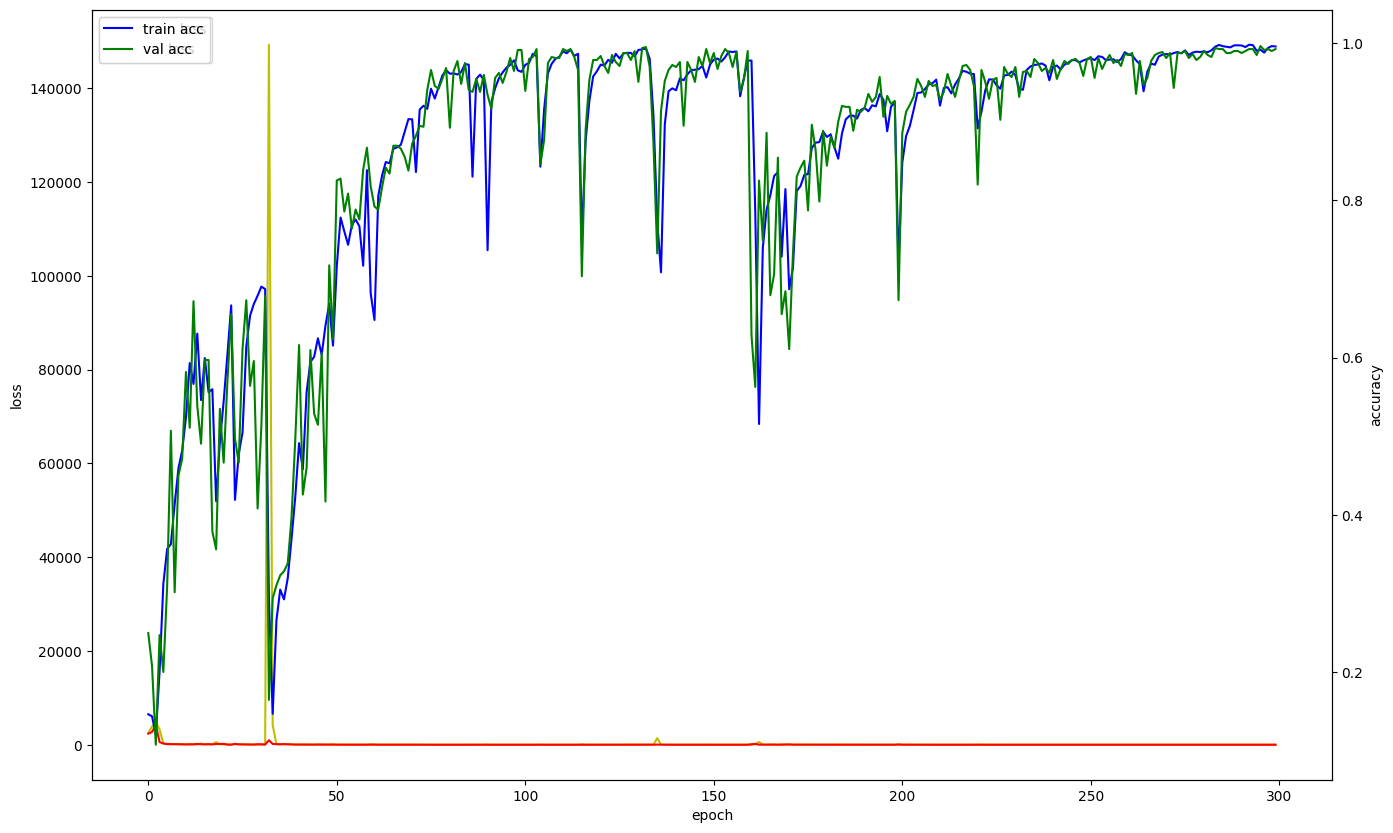

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig('/content/drive/MyDrive/0518_02.png')
plt.show()



<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/models/0518_02.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

25/25 [==============================] - 0s 6ms/step


array([[[705,   0],
        [  0,  84]],

       [[714,   1],
        [  0,  74]],

       [[713,   0],
        [  0,  76]],

       [[711,   2],
        [  0,  76]],

       [[695,   0],
        [  1,  93]],

       [[704,   0],
        [  0,  85]],

       [[724,   0],
        [  2,  63]],

       [[715,   0],
        [  0,  74]],

       [[699,   0],
        [  0,  90]],

       [[718,   0],
        [  0,  71]]])